In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [4]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /Users/kgarg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kgarg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/kgarg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/kgarg/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [5]:
!pip install emot

In [6]:
!pip install pyspellchecker
from spellchecker import SpellChecker

In [7]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt

import scipy

import warnings
warnings.filterwarnings('ignore')

import re
from collections import Counter
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

In [8]:
from sklearn.naive_bayes import MultinomialNB


In [9]:
df['OriginalTweet'].str.lower().str.split().apply(len).sum()
pd.options.display.max_colwidth=200
df['OriginalTweet'][3:6]

NameError: name 'df' is not defined

In [10]:
train = pd.read_csv('./data/Corona_NLP_train.csv', encoding="ISO-8859-1", low_memory=False)
test = pd.read_csv('./data/Corona_NLP_test.csv', encoding="ISO-8859-1", low_memory=False) 
#df = train.append(test, sort = False)

In [11]:
# -- filling missing values
train['Location'].fillna(value='unknown', inplace=True) 
test['Location'].fillna(value='unknown', inplace=True) 

In [12]:
# -- label encoding 
encoding = {'Extremely Negative': 'Negative',
            'Extremely Positive': 'Positive'
           }
labels = ['Negative', 'Positive']
train['Sentiment'].replace(encoding, inplace=True)
train["sentiment"] = LabelEncoder().fit_transform(train["Sentiment"])

test['Sentiment'].replace(encoding, inplace=True)
test["sentiment"] = LabelEncoder().fit_transform(test["Sentiment"])

In [13]:
# -- remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

from bs4 import BeautifulSoup
# -- remove HTML
def html(text):
    return BeautifulSoup(text, "lxml").text

train['OriginalTweet'] = train['OriginalTweet'].apply(remove_urls)
train['OriginalTweet'] = train['OriginalTweet'].apply(html)

test['OriginalTweet'] = test['OriginalTweet'].apply(remove_urls)
test['OriginalTweet'] = test['OriginalTweet'].apply(html)

In [14]:
# -- lowercase
train['OriginalTweet'] = train['OriginalTweet'].str.lower()

test['OriginalTweet'] = test['OriginalTweet'].str.lower()

In [212]:
# -- convert emojis and emoticons to words
def convert_emojis_emoticons(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

train['OriginalTweet'] = train['OriginalTweet'].apply(convert_emojis_emoticons)

test['OriginalTweet'] = test['OriginalTweet'].apply(convert_emojis_emoticons)

In [15]:
# -- remove special and non-ASCII characters
def clean(tweet): 
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"â²", "", tweet)
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"â¹", "", tweet)
    tweet = re.sub(r"â½", "", tweet)
    tweet = re.sub(r"â¾", "", tweet)
    tweet = re.sub(r"ã¼berweist", "", tweet)
    tweet = re.sub(r"ã¼cretsiz", "", tweet)
    tweet = re.sub(r"zã¼rich", "", tweet)
    tweet = re.sub(r"ã¼retime", "", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    tweet = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'mentioned', tweet)
    tweet = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'referance', tweet)
    tweet = re.sub(r'£|\$', 'money', tweet)
    tweet = re.sub(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', ' ', tweet)
    tweet = re.sub(r'\d+(\.\d+)?', ' ', tweet) 
    tweet = re.sub(r'[^\w\d\s]', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = re.sub(r'^\s+|\s+?$', '', tweet.lower())
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet) 
    tweet = re.sub(r"_", "  ", tweet)
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')
    return str(tweet)

train['OriginalTweet'] = train['OriginalTweet'].apply(clean)

test['OriginalTweet'] = test['OriginalTweet'].apply(clean)

In [216]:
# -- spellcheck and keep words that are in the English dictionary
spell = SpellChecker(distance = 1, language='en')
words = set(nltk.corpus.words.words())

def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else: 
            corrected_text.append(word)
    return " ".join(corrected_text)

def ensure_english(text):
    return " ".join(w for w in nltk.wordpunct_tokenize(text) \
         if w.lower() in words or not w.isalpha())

train['OriginalTweet'] = train['OriginalTweet'].apply(correct_spellings)
train['OriginalTweet'] = train['OriginalTweet'].apply(ensure_english)

test['OriginalTweet'] = test['OriginalTweet'].apply(correct_spellings)
test['OriginalTweet'] = test['OriginalTweet'].apply(ensure_english)

In [16]:
# -- remove punctuation
import string
regular_punct = list(string.punctuation)
def remove_punctuation(text):
    for punc in regular_punct:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip()

train['OriginalTweet'] = train['OriginalTweet'].apply(remove_punctuation)

test['OriginalTweet'] = test['OriginalTweet'].apply(remove_punctuation)

In [17]:
# -- remove stopwords
en_stops = set(stopwords.words('english'))
def remove_stopwords(tweet):
  tweet = tweet.split()
  tweet = " ".join([word for word in tweet if not word in en_stops])  
  return tweet

train['OriginalTweet'] = train['OriginalTweet'].apply(remove_stopwords)

test['OriginalTweet'] = test['OriginalTweet'].apply(remove_stopwords)

In [18]:
# -- tokenize
train['OriginalTweet'] = train['OriginalTweet'].apply(word_tokenize)

test['OriginalTweet'] = test['OriginalTweet'].apply(word_tokenize)

In [19]:
# -- lematize
lem = WordNetLemmatizer()
def lemma_wordnet(input):
    return [lem.lemmatize(w) for w in input]

train['OriginalTweet'] = train['OriginalTweet'].apply(lemma_wordnet)

test['OriginalTweet'] = test['OriginalTweet'].apply(lemma_wordnet)

In [20]:
# -- combine individual words
def combine_text(input):
    combined = ' '.join(input)
    return combined

train['OriginalTweet'] = train['OriginalTweet'].apply(combine_text)

test['OriginalTweet'] = test['OriginalTweet'].apply(combine_text)

In [21]:
# -- Bag of words

cv = CountVectorizer(ngram_range=(1, 1))
X_train_bow = cv.fit_transform(train['OriginalTweet']) 
Y_train_bow = train['sentiment'] 

X_test_bow = cv.transform(test['OriginalTweet'])
Y_test_bow = test['sentiment']


In [22]:
# -- Bag of words - bigrams

cv_bbow = CountVectorizer(ngram_range=(2, 2))
X_train_bbow = cv_bbow.fit_transform(train['OriginalTweet']) 
Y_train_bbow = train['sentiment']

X_test_bbow = cv_bbow.transform(test['OriginalTweet']) 
Y_test_bbow = test['sentiment']

In [23]:
# -- TF-IDF

vectorizer = TfidfVectorizer(min_df = 2, max_df = 0.8, use_idf = True, ngram_range=(1, 1))

vectorizer.fit(train)
X_train_tfidf = vectorizer.fit_transform(train['OriginalTweet'])
Y_train_tfidf = train['sentiment'] 

X_test_tfidf =vectorizer.transform(test['OriginalTweet']) 
Y_test_tfidf = test['sentiment'] 

In [23]:
display("B-BoW:", X_train_bbow.shape)
df_bbow = pd.DataFrame(X_train_bbow.toarray(), columns=cv_bbow.get_feature_names())
display(df_bbow.head())

'B-BoW:'

(41157, 387999)

,aa baker,aa cristobal,aaa covid,aaa gas,aaa low,aaa official,aaa say,aaa texas,aaaaas commission,aaaand toilet,...,âmoney worth,âmoney would,âmoney wow,âmoney yes,âmoney yorkshire,âmoney âmoney,âmoneycashtag chance,âmoneyxx offer,ãmoneyo contra,ãmoneyo precaucao
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


alpha:  1e-10
[0.61783285 0.63022352 0.61754343 0.61110436 0.61559956]
0.6184607445908055


alpha:  1e-05
[0.61929057 0.63155977 0.61936581 0.61292674 0.61790791]
0.6202101603610707


alpha:  0.1
[0.6643586  0.66824587 0.65824323 0.65484145 0.65800024]
0.6607378786424405


alpha:  1.0
[0.67504859 0.67723518 0.66893452 0.67039242 0.67172883]
0.6726679070885517


alpha:  2.0
[0.65816327 0.66350826 0.65654234 0.65447698 0.65727129]
0.6579924268855363


alpha:  5.0
[0.64407191 0.64674441 0.63236545 0.64026242 0.63066456]
0.6388217515167894


0.6690363349131122
precision: [0.68948247 0.58910891 0.65758755]
recall: [0.75872627 0.19224556 0.76520052]
fscore: [0.72244898 0.28989038 0.70732436]
support: [1633  619 1546]


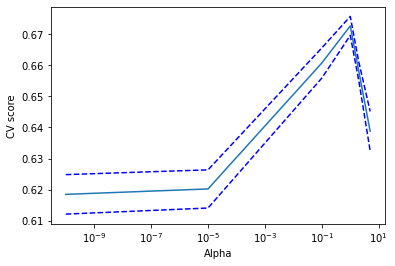

In [37]:
# -- multinomialNB with bag of word
alpha = [1e-10, 1e-5, 0.1, 1.0, 2.0, 5.0]
scores_list = list()
scores_std = list()
for a in alpha:
    mnb = MultinomialNB(a)
    scores = sklearn.model_selection.cross_val_score(mnb, X_train_bow, Y_train_bow, cv=5)
    scores_list.append(np.mean(scores))
    scores_std.append(np.std(scores))
    print('alpha: ', a)
    print(scores)
    print(np.mean(scores))
    print('\n')

mnb = MultinomialNB(alpha = 1)
mnb.fit(X_train_bow, Y_train_bow)
print(mnb.score(X_test_bow, Y_test_bow))

precision, recall, fscore, support = score(Y_test_bow, mnb.predict(X_test_bow))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

# Do the plotting
import matplotlib.pyplot as plt
plt.figure()
plt.semilogx(alpha, scores_list)
plt.semilogx(alpha, np.array(scores_list) + np.array(scores_std), 'b--')
plt.semilogx(alpha, np.array(scores_list) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.ylabel('CV score')
plt.xlabel('Alpha')
plt.show()

alpha:  1e-10
[0.55272109 0.56632653 0.53814383 0.55199223 0.55417881 0.5617104
 0.53911565 0.55674362 0.5671932  0.55893074]
0.5547056090271554


alpha:  1e-05
[0.53790087 0.54591837 0.52380952 0.53328474 0.53206997 0.54081633
 0.51797862 0.5399757  0.54313487 0.53341434]
0.5348303334525963


alpha:  0.1
[0.44047619 0.42614189 0.43634597 0.43707483 0.4154519  0.42031098
 0.40913508 0.41652491 0.41919806 0.40413123]
0.4224791023856166


alpha:  1.0
[0.54446064 0.52988338 0.53279883 0.53401361 0.51627794 0.53911565
 0.51044704 0.52466586 0.51980559 0.51154313]
0.5263011665350048


alpha:  2.0
[0.57798834 0.55344995 0.55442177 0.56073858 0.5451895  0.57458698
 0.55272109 0.5582017  0.55893074 0.54556501]
0.5581793658272196


alpha:  5.0
[0.57555879 0.56997085 0.5675413  0.58114674 0.55466472 0.58041788
 0.57677357 0.57181045 0.5837181  0.56840826]
0.5730010674639583


0.5668773038441285
precision: [0.65932452 0.46153846 0.51547668]
recall: [0.54990814 0.00969305 0.80789133]
fscore: [0.59

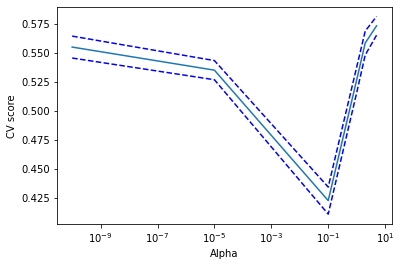

In [39]:
# -- multinomialNB with bigram bag of word
alpha = [1e-10, 1e-5, 0.1, 1.0, 2.0, 5.0]
scores_list = list()
scores_std = list()
for a in alpha:
    mnb = MultinomialNB(a)
    scores = sklearn.model_selection.cross_val_score(mnb, X_train_bbow, Y_train_bbow, cv=10)
    scores_list.append(np.mean(scores))
    scores_std.append(np.std(scores))
    print('alpha: ', a)
    print(scores)
    print(np.mean(scores))
    print('\n')

mnb.fit(X_train_bbow, Y_train_bbow)
print(mnb.score(X_test_bbow, Y_test_bbow))

precision, recall, fscore, support = score(Y_test_bbow, mnb.predict(X_test_bbow))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
#accuracy_score(mnb.predict(X_test_bbow), Y_test_bbow)


# Do the plotting
import matplotlib.pyplot as plt
plt.figure()
plt.semilogx(alpha, scores_list)
plt.semilogx(alpha, np.array(scores_list) + np.array(scores_std), 'b--')
plt.semilogx(alpha, np.array(scores_list) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.ylabel('CV score')
plt.xlabel('Alpha')
plt.show()

In [34]:
scores_list

[0.5547056090271554,
 0.5348303334525963,
 0.4224791023856166,
 0.5263011665350048,
 0.5581793658272196,
 0.5730010674639583]

alpha:  175.0
[0.47667638 0.48785228 0.48420797 0.4749757  0.47400389 0.46622935
 0.47570457 0.46950182 0.45686513 0.45929526]
0.47253123571942224


alpha:  200.0
[0.47060253 0.48080661 0.47594752 0.47011662 0.46817298 0.46015549
 0.46817298 0.46196841 0.45224787 0.45735115]
0.4665542168959235


alpha:  225.0
[0.46501458 0.47400389 0.47084548 0.4664723  0.46282799 0.45699708
 0.46282799 0.4563791  0.44860267 0.45516403]
0.4619135118029159


alpha:  250.0
[0.4606414  0.46987366 0.46525753 0.46379981 0.45845481 0.45359572
 0.45894072 0.45224787 0.44738761 0.45176185]
0.45819609808860184


alpha:  300.0
[0.4552964  0.45845481 0.45748299 0.4579689  0.45408163 0.45019436
 0.45189504 0.44617254 0.44398542 0.44690158]
0.4522433687934469


0.6542917324907846
precision: [0.74020888 0.73333333 0.59342638]
recall: [0.69442743 0.05331179 0.85252264]
fscore: [0.71658768 0.09939759 0.69976108]
support: [1633  619 1546]


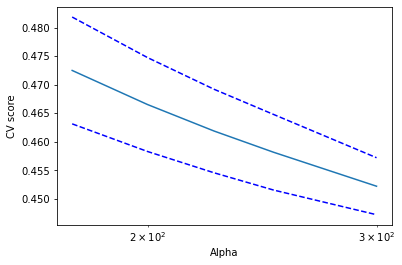

In [38]:
# -- multinomialNB with TF-IDF
alpha = [175.0, 200.0, 225.0, 250.0, 300.0]
scores_list = list()
scores_std = list()
for a in alpha:
    mnb = MultinomialNB(a)
    scores = sklearn.model_selection.cross_val_score(mnb, X_train_tfidf, Y_train_tfidf, cv=10)
    scores_list.append(np.mean(scores))
    scores_std.append(np.std(scores))
    print('alpha: ', a)
    print(scores)
    print(np.mean(scores))
    print('\n')
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, Y_train_tfidf)
print(mnb.score(X_test_tfidf, Y_test_tfidf))

precision, recall, fscore, support = score(Y_test_tfidf, mnb.predict(X_test_tfidf))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))


# Do the plotting
import matplotlib.pyplot as plt
plt.figure()
plt.semilogx(alpha, scores_list)
plt.semilogx(alpha, np.array(scores_list) + np.array(scores_std), 'b--')
plt.semilogx(alpha, np.array(scores_list) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.ylabel('CV score')
plt.xlabel('Alpha')
plt.show()

In [284]:
# -- decision tree classifier with BoW
dtclassifier=DecisionTreeClassifier(criterion="entropy", max_depth=None)
score=cross_val_score(dtclassifier, X_train_bow, Y_train_bow, cv=10)
dtclassifier.fit(X_train_bow, Y_train_bow)
preddt = dtclassifier.predict(X_test_bow)

In [291]:
tree_para = {'criterion':['gini','entropy']}
clf = GridSearchCV(DecisionTreeClassifier(max_depth=None), tree_para, cv=10)
clf.fit(X_train_bow, Y_train_bow)
preddt = dtclassifier.predict(X_test_bow)

In [293]:
accuracy= accuracy_score(preddt,Y_test_bow)
print(accuracy)
#print(score.mean())
# unigram: .69

precision, recall, fscore, support = score(Y_test_bbow, preddt)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

0.6545550289626119
precision: [0.68603043 0.55375552 0.66826061]
recall: [0.60747091 0.60743134 0.72315653]
fscore: [0.64436505 0.57935285 0.69462566]
support: [1633  619 1546]


In [ ]:
# -- decision tree classifier with B-BoW
tree_para = {'criterion':['gini','entropy']}
clf = GridSearchCV(DecisionTreeClassifier(max_depth=None), tree_para, cv=10)
clf.fit(X_train_bbow, Y_train_bbow)
preddt = clf.predict(X_test_bbow)

In [ ]:
accuracy= accuracy_score(preddt,Y_test_bbow)
print(accuracy)
precision, recall, fscore, support = score(Y_test_bbow, preddt)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

In [50]:
# -- decision tree classifier with tf-idf
tree_para = {'criterion':['gini','entropy']}
clf = GridSearchCV(DecisionTreeClassifier(max_depth=None), tree_para, cv=10)
clf.fit(X_train_tfidf,Y_train_tfidf)
preddt = clf.predict(X_test_tfidf) 

In [51]:
accuracy= accuracy_score(preddt,Y_test_tfidf)
print(accuracy)
precision, recall, fscore, support = score(Y_test_tfidf, preddt)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

0.5958399157451291
precision: [0.63685272 0.4435591  0.63029525]
recall: [0.57991427 0.53957997 0.63518758]
fscore: [0.60705128 0.48688047 0.63273196]
support: [1633  619 1546]


In [51]:
# -- SVM, kernel=linear - tfidf
import time
from sklearn import svm
from sklearn.metrics import classification_report
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(X_train_tfidf, Y_train_tfidf)
prediction_linear = classifier_linear.predict(X_test_tfidf)

In [52]:
accuracy= accuracy_score(prediction_linear,Y_test_tfidf)
print(accuracy)
precision, recall, fscore, support = score(Y_test_tfidf, prediction_linear)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

0.79884149552396
precision: [0.81614907 0.72521739 0.80781153]
recall: [0.80465401 0.67366721 0.84282018]
fscore: [0.81036078 0.69849246 0.8249446 ]
support: [1633  619 1546]


In [31]:
accuracy= accuracy_score(prediction_linear,Y_test_bow)
print(accuracy)
precision, recall, fscore, support = score(Y_test_bow, prediction_linear)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

0.7943654555028963
precision: [0.8140263  0.67633588 0.8240621 ]
recall: [0.79608083 0.71567044 0.8240621 ]
fscore: [0.80495356 0.69544741 0.8240621 ]
support: [1633  619 1546]


In [47]:
## -- logistic regression with bow 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', multi_class="multinomial")
log_reg.fit(X_train_tfidf, Y_train_tfidf)

LogisticRegression(multi_class='multinomial')

In [50]:
test_accuracy = log_reg.score(X_test_tfidf, Y_test_tfidf)
pred = log_reg.predict(X_test_tfidf)
accuracy= accuracy_score(pred, Y_test_tfidf)
print(accuracy)
precision, recall, fscore, support = score(Y_test_tfidf, pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

0.785676671932596
precision: [0.80865747 0.72621359 0.7821196 ]
recall: [0.78934476 0.60420032 0.85446313]
fscore: [0.79888441 0.65961199 0.81669243]
support: [1633  619 1546]


,C_values,Test Accuracy
0,0.001,0.408636
1,0.010,0.581622
2,0.100,0.715113
3,1.000,0.785677
4,10.000,0.802001
5,100.000,0.795155
6,1000.000,0.793576


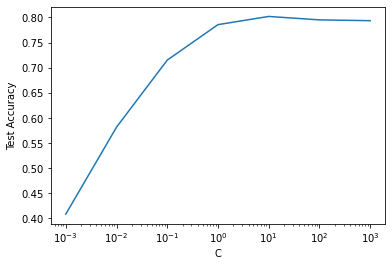

In [49]:
# -- validation for multinomial log reg 
C_values = [0.001,0.01, 0.1,1,10,100, 1000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train_tfidf, Y_train_tfidf)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Test Accuracy': lr.score(X_test_tfidf, Y_test_tfidf)
                                             }, ignore_index=True)
display(accuracy_values) 

# Do the plotting
import matplotlib.pyplot as plt
plt.figure()
plt.semilogx(accuracy_values['C_values'], accuracy_values['Test Accuracy'])
locs, labels = plt.yticks()
plt.ylabel('Test Accuracy')
plt.xlabel('C')
plt.show()

In [45]:
# -- grid search
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

In [46]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=log_reg,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X_train_bow, Y_train_bow)

GridSearchCV(cv=10, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [47]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'C': 1, 'penalty': 'l2'}
Best Score      :  0.8028285433249849


In [ ]:

%time results = grid_cv.cv_results_

df1 = pd.DataFrame(results)
display(df1.head(35))
df1.info()

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 11.2 µs


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002367,0.000275,0.000000,0.000000,1e-05,l1,"{'C': 1e-05, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,3.313961,0.044434,0.010587,0.000077,1e-05,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.437129,0.436833,0.437129,0.437129,0.437129,0.437129,0.437259,0.437259,0.437259,0.437259,0.437152,0.000123,9
2,0.002228,0.000192,0.000000,0.000000,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
3,3.190604,0.081269,0.011091,0.001986,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.437129,0.436833,0.437129,0.437129,0.437129,0.437129,0.437259,0.437259,0.437259,0.437259,0.437152,0.000123,9
4,0.002420,0.000151,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
5,3.347032,0.042141,0.011306,0.002212,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.438019,0.439798,0.438909,0.438019,0.438909,0.439502,0.439632,0.439929,0.439039,0.439632,0.439139,0.000656,8
6,0.002300,0.000184,0.000000,0.000000,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
7,6.741687,0.069908,0.011410,0.002420,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.575030,0.559312,0.567023,0.551008,0.570285,0.564947,0.557995,0.563631,0.564818,0.555918,0.562997,0.006738,7
8,0.002367,0.000176,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
9,17.001108,0.650369,0.011164,0.001499,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.684164,0.673488,0.678826,0.653025,0.682681,0.668743,0.674281,0.680510,0.673984,0.659745,0.672944,0.009510,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      20 non-null     float64
 1   std_fit_time       20 non-null     float64
 2   mean_score_time    20 non-null     float64
 3   std_score_time     20 non-null     float64
 4   param_C            20 non-null     object 
 5   param_penalty      20 non-null     object 
 6   params             20 non-null     object 
 7   split0_test_score  10 non-null     float64
 8   split1_test_score  10 non-null     float64
 9   split2_test_score  10 non-null     float64
 10  split3_test_score  10 non-null     float64
 11  split4_test_score  10 non-null     float64
 12  split5_test_score  10 non-null     float64
 13  split6_test_score  10 non-null     float64
 14  split7_test_score  10 non-null     float64
 15  split8_test_score  10 non-null     float64
 16  split9_test_score  10 non-nu

In [ ]:
df1 = df1[['param_penalty','param_C', 'mean_test_score']]
df1 = df1.sort_values(by='mean_test_score', ascending = False)
df1

,param_penalty,param_C,mean_test_score
13,l2,10,0.818513
15,l2,100,0.812345
17,l2,1000,0.800036
19,l2,10000,0.795409
11,l2,1,0.774321
9,l2,0.1,0.672944
7,l2,0.01,0.562997
5,l2,0.001,0.439139
1,l2,1e-05,0.437152
3,l2,0.0001,0.437152
